In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk(''):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Loading the Dataset

In [4]:
df_forest = pd.read_csv("forestfires(1).csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Exploratory Data Analysis

In [3]:
import numpy as np
df_forest_ = df_forest.copy()
df_forest_['area'] = np.log(df_forest_['area'] + 1)

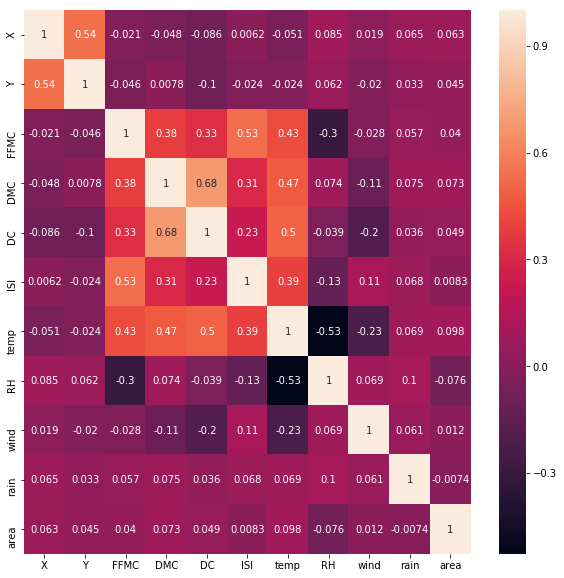

In [4]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(df_forest.corr(), annot = True)

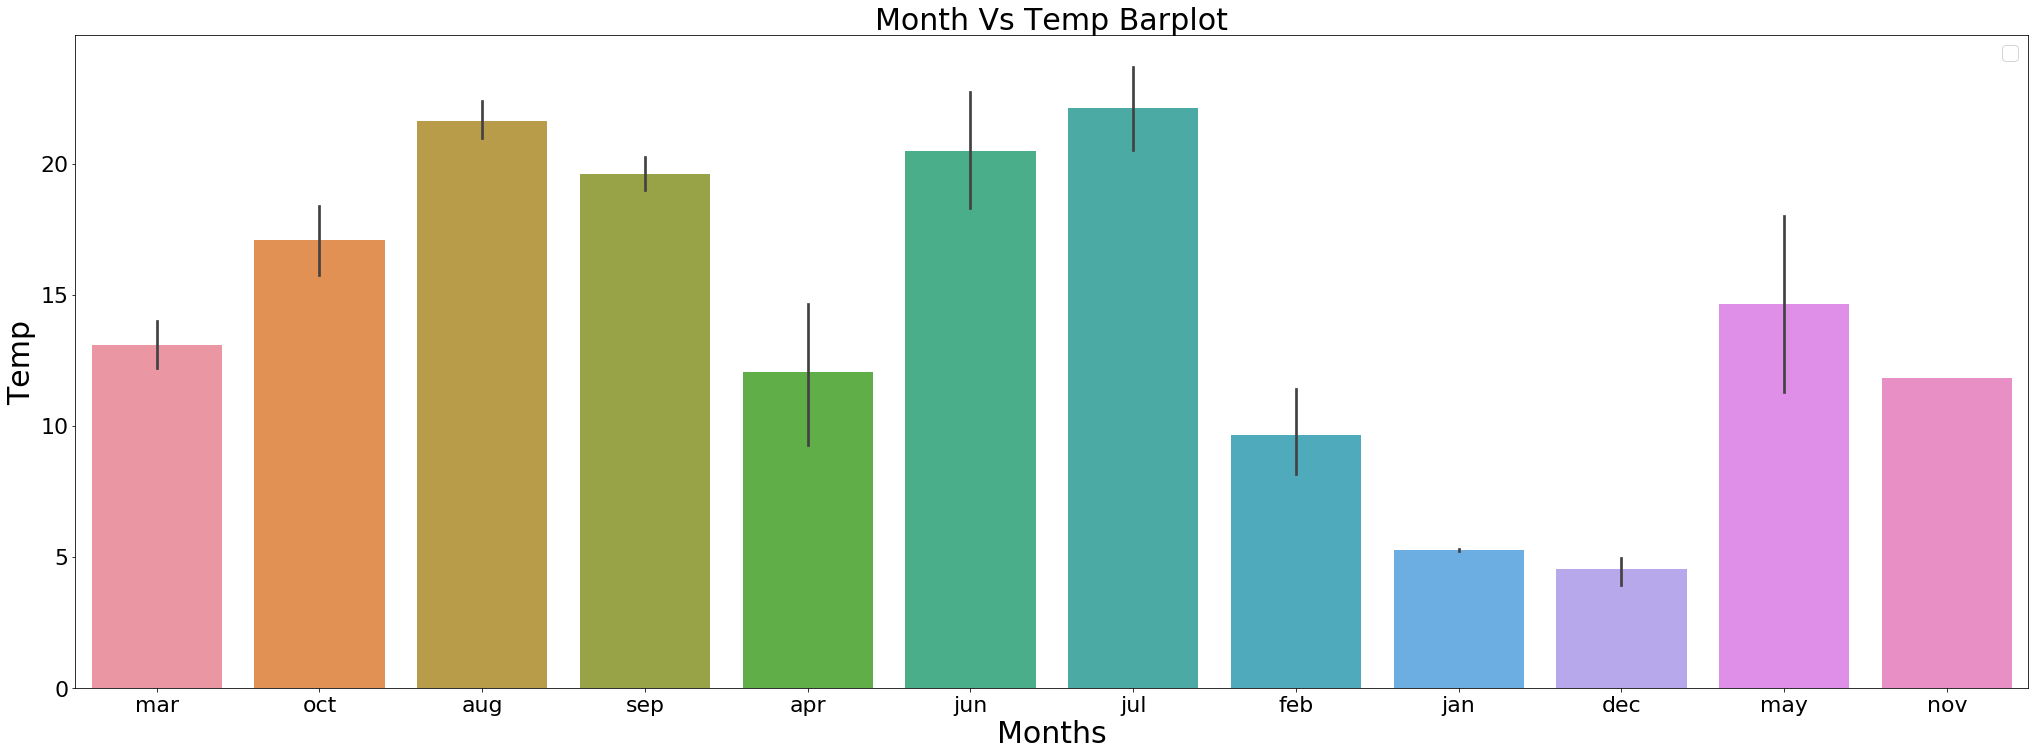

In [5]:
plt.rcParams['figure.figsize'] = [35,12]
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_forest);
month_temp.axes.set_title("Month Vs Temp Barplot", fontsize = 30)
month_temp.set_xlabel("Months", fontsize = 30)
month_temp.set_ylabel("Temp", fontsize = 30)
month_temp.tick_params(labelsize = 22)
month_temp.legend(fontsize = 20)

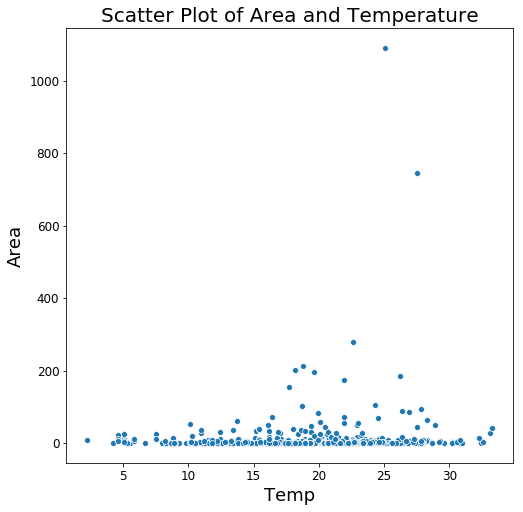

In [6]:
plt.rcParams['figure.figsize'] = [8, 8]
scat = sns.scatterplot(df_forest['temp'], df_forest['area'])
scat.axes.set_title("Scatter Plot of Area and Temperature", fontsize = 20)
scat.set_xlabel("Temp", fontsize = 18)
scat.set_ylabel("Area", fontsize = 18)
scat.tick_params(labelsize = 12)

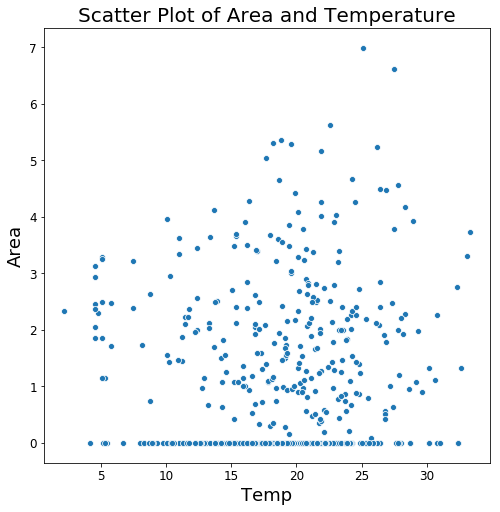

In [7]:
# After Removing the Skewness
plt.rcParams['figure.figsize'] = [8, 8]
scat = sns.scatterplot(df_forest_['temp'], df_forest_['area'])
scat.axes.set_title("Scatter Plot of Area and Temperature", fontsize = 20)
scat.set_xlabel("Temp", fontsize = 18)
scat.set_ylabel("Area", fontsize = 18)
scat.tick_params(labelsize = 12)

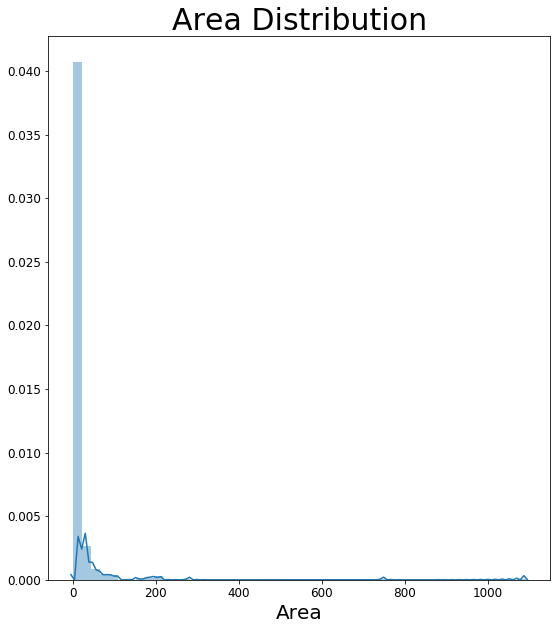

In [8]:
plt.rcParams['figure.figsize'] = [9, 10]
area_dist = sns.distplot(df_forest['area']);
area_dist.axes.set_title("Area Distribution", fontsize = 30)
area_dist.set_xlabel("Area", fontsize = 20)
area_dist.tick_params(labelsize = 12)

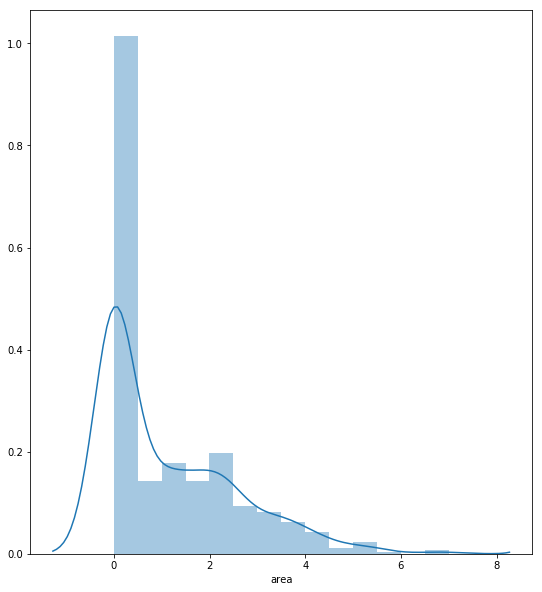

In [9]:
# Reduced skewness
sns.distplot(df_forest_['area'])

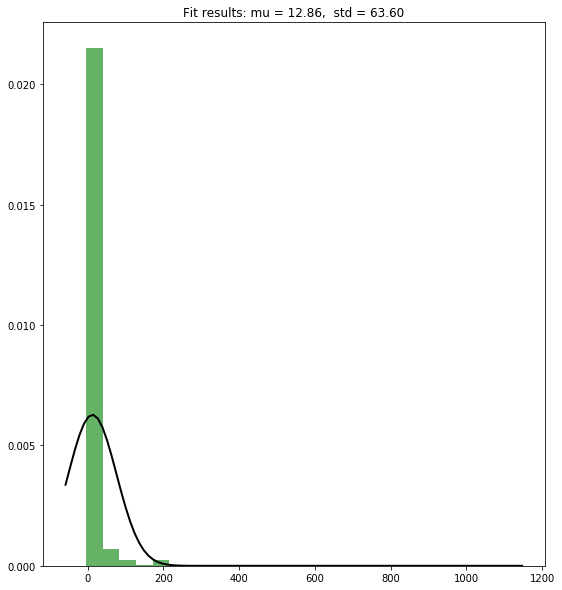

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(df_forest['area'])

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Text(0, 0.5, 'Count')

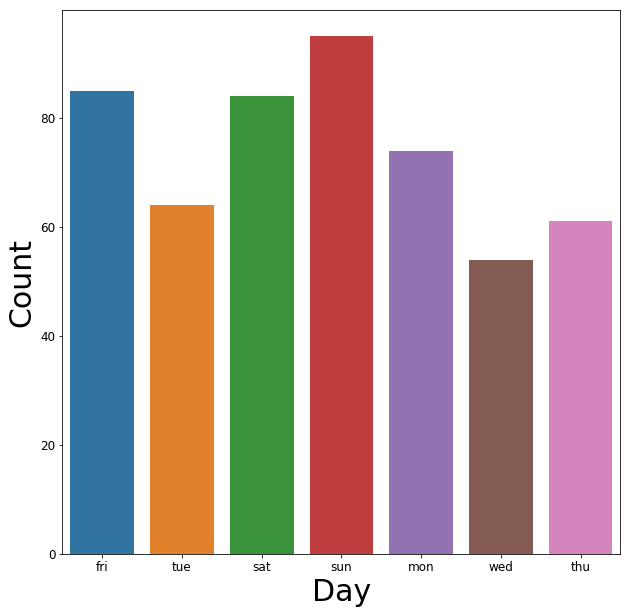

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
day = sns.countplot(df_forest['day'])
day.tick_params(labelsize = 12)
day.set_xlabel("Day", fontsize = 30)
day.set_ylabel("Count", fontsize = 30)

## Preprocessing

In [6]:
import numpy as np
df_forest['area'] = np.log(df_forest['area'] + 1)

In [21]:
df_forest.shape

(517, 13)

In [13]:
df_forest.max()

X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         56.1
temp        33.3
RH           100
wind         9.4
rain         6.4
area     6.99562
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical = list(df_forest.select_dtypes(include = ["object"]).columns)
for i, column in enumerate(categorical) :
    label = LabelEncoder()
    df_forest[column] = label.fit_transform(df_forest[column])

In [17]:
df_forest['day'].value_counts()

3    95
0    85
2    84
1    74
5    64
4    61
6    54
Name: day, dtype: int64

In [18]:
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
outcome = df_forest['area']
features = df_forest.drop(columns = 'area')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.15, random_state = 196)

In [10]:
from sklearn.metrics import r2_score

In [21]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,11,1,91.5,130.1,807.1,7.5,12.2,66,4.9,0.0
6,8,6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
485,2,4,1,1,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0
419,2,5,1,3,91.6,181.3,613.0,7.6,24.8,36,4.0,0.0
263,6,3,1,0,91.1,141.1,629.1,7.1,19.3,39,3.6,0.0


## MODELLING

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

1.7696834772476915

In [12]:
r2_score(y_test, predictions)

-0.0606252045784037

Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [14]:
poly_X_test

array([[1., 6., 3., ..., 0., 0., 0.],
       [1., 8., 6., ..., 0., 0., 0.],
       [1., 7., 5., ..., 0., 0., 0.],
       ...,
       [1., 8., 5., ..., 0., 0., 0.],
       [1., 8., 6., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.]])

In [15]:
model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)
predictions_poly = model_2.predict(poly_X_test)
mean_squared_error(y_test, predictions_poly)

4461.627754063942

In [16]:
r2_score(y_test, predictions_poly)

-2672.9893942878402

Lasso

In [17]:
from sklearn.linear_model import Lasso
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)

prediction = model_3.predict(X_test)
mean_squared_error(y_test, prediction)

1.6692539081387816

In [18]:
r2_score(y_test, prediction)

-0.0004347051747921604

In [22]:
from sklearn.linear_model import Ridge
model_5 = Ridge(alpha = 500)
model_5.fit(X_train, y_train)

pred = model_5.predict(X_test)
mean_squared_error(y_test, pred)

1.753775860185977

In [23]:
r2_score(y_test, pred)

-0.05109128519826922

ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet
model_6 = ElasticNet(alpha = 100, max_iter = 10000)
model_6.fit(X_train, y_train)

pred1 = model_6.predict(X_test)
mean_squared_error(y_test, pred1)

1.6692539081387816

In [25]:
r2_score(y_test, pred1)

-0.0004347051747921604

MSE VS Different values of C

In [33]:
from sklearn.svm import SVR
dict_ = {}
for i in range(1,11):
    model_4 = SVR(C = i, kernel = 'linear')
    model_4.fit(X_train, y_train)
    predictions = model_4.predict(X_test)
    
    dict_[i] = mean_squared_error(y_test, predictions)

Text(0,0.5,'mean squared error')

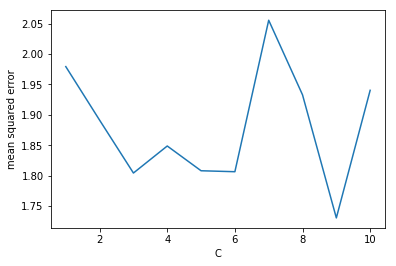

In [34]:
import matplotlib.pyplot as plt
plt.plot(dict_.keys(), dict_.values())
plt.xlabel("C")
plt.ylabel("mean squared error")

In [27]:
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [28]:
from sklearn.svm import SVR
model_4 = SVR(C = 100, kernel = 'linear')
model_4.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
prediction = model_4.predict(X_test)
mean_squared_error(y_test, prediction)

11.095505644561575

In [30]:
r2_score(y_test, prediction)

-5.649874452388775

In [31]:
prediction = np.exp(prediction - 1)

In [35]:
prediction

array([1.46580556e+00, 1.48027899e+00, 1.42471583e-01, 2.94912855e-02,
       2.33439751e+01, 1.78669273e+00, 7.19285019e-01, 1.40977767e+01,
       4.80862942e+03, 3.74041372e+00, 1.24188270e-02, 3.55756135e-01,
       4.73657642e+00, 6.13050931e-01, 4.32355315e-01, 1.23375014e+00,
       2.55314807e-02, 1.38543854e-02, 5.61033743e+00, 3.12216018e-01,
       1.79927715e+00, 6.13959588e-02, 1.14211035e-01, 2.61061171e-01,
       4.56178205e+00, 1.24904258e+00, 2.99736916e-01, 4.62511835e-02,
       1.08397226e-01, 1.49948977e-02, 1.92529748e-01, 1.10846000e+02,
       1.50406862e-01, 1.65291395e+00, 7.55871155e-02, 3.00673449e-01,
       1.27433273e-01, 2.34995984e-02, 6.78931651e-03, 8.27870558e-02,
       2.98211299e-01, 1.23135309e+01, 8.20677262e+00, 1.22406302e-01,
       9.71262749e-02, 5.43853380e-02, 1.87151564e+00, 7.69605909e-01,
       1.11176487e+00, 9.56327753e-02, 1.10437047e-01, 3.48543483e-01,
       1.83823313e+00, 1.72098292e-01, 7.95805229e-01, 1.10948344e+00,
      

In [36]:
X_test.iloc[0:2,:]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
36,6,3,10,5,90.6,35.4,669.1,6.7,21.7,24,4.5,0.0
181,8,6,10,1,84.9,32.8,664.2,3.0,19.1,32,4.0,0.0


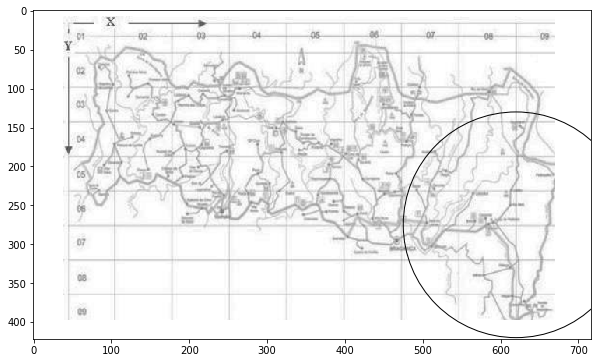

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import cv2

img = plt.imread("/kaggle/input/imageadded/map.png")

x = np.array([620])
Y = np.array([275])

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,YY in zip(x,Y):
    circ = Circle((xx,YY),145, fill=False)
    ax.add_patch(circ)

# Show the image

plt.show()



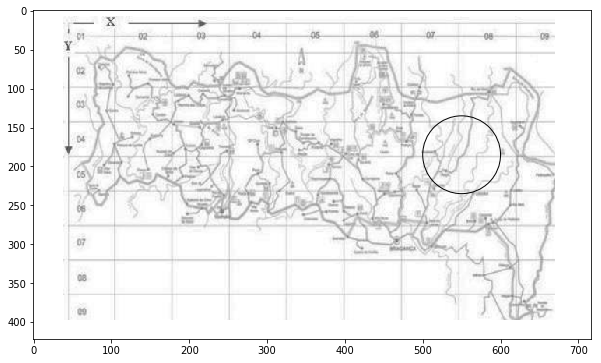

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import cv2

img = plt.imread("/kaggle/input/imageadded/map.png")

x = np.array([550])
Y = np.array([185])

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,YY in zip(x,Y):
    circ = Circle((xx,YY),50, fill=False)
    ax.add_patch(circ)

# Show the image

plt.show()

